# Counterparty Credit Valuation Adjustment (CVA)

### Exposure Profile

Uncertain future exposure can be visualized by means of exposure profiles. These profiles are obtained by calculating certain statistics of the exposure distribution at each simulation date. 
There are two main effect that determine the credit exposure over time for a single transaction or for a portfolio of transactions with the same counterparty: diffusion and amortization. As time passes, the "diffusion effect" tends to increase the exposure, since there is greater potential for market price factors (such as the FX or interest rates) to move significantly away from current levels; the "amortization effect", in contrast, thends to decrease the exposure over time, because it reduces the remaining cash flows that are exposed to default.
These two effects acts in opposite directions (the diffusion effect increase the credit exposure and the amortization effect decreases it over time). For single cash products, such as FX forward, the potential exposure peaks at the maturity of the transaction, because it is driven purely by diffusion effect. On the other hand for products with multiple cash flows, such as interest rate swaps, the potential exposure usually peack at one-third to one-half of the way into the life of the transaction.

### The General Unilateral Counterparty Risk  Pricing Formula 

<cite data-cite="brigo2013">(D. Brigo, Morini M. and Pallavicini A., "Counterparty Credit Risk, Collateral and Funding" Wiley Finance 2013)</cite>

At valuation time $t$, and provided the counterparty has not defaulted before $t$, i.e. on $\{ \tau > t \}$, the price of our payoff with maturity $T$ under counterparty risk is

$$
\begin{align}
\mathbb{E}_t [\bar \Pi (t, T) ] &=  \mathbb{E}_t [\Pi (t, T) ]  - 
\underbrace{
\mathbb{E}_t [ LGD \> \mathbb{1}_{t \le \tau \le T} D(t, \tau) (NPV(\tau))^+ ]  
}_\text{positive counterparty-risk adjustment} \\
&= \mathbb{E}_t [\Pi (t, T) ]  - U_{CVA}(t,T)
\end{align}
$$

with

$$
\begin{align}
U_{CVA}(t,T) &= \mathbb{E}_t [ LGD \> \mathbb{1}_{t \le \tau \le T} D(t, \tau) (NPV(\tau))^+ ] \\
&= \mathbb{E}_t [ LGD \> \mathbb{1}_{t \le \tau \le T} D(t, \tau) EAD ]
\end{align}
$$

Where $LGD = 1 - REC$ is the loss given default, and the recovery fraction $REC$ is assumed to be deterministic. 

It is clear that the value of a defaultable claim is the sum of the value of the corresponding default-free claim minus a positive adjustment. The positive adjustment to be subtracted is called (Unilateral) Credit Valuation Adjustment (CVA), and it is given by a call option (with zero strike) on the residual NPV at default, giving nonzero contribution only in scenario where $\tau \le T$.

Counterparty risk thus adds and optionality level to the original payoff. This renders the counterparty risk payoff model dependent even when the original payoff is model independent. This implies, for example, that while the valuation of swaps without counterparty risk is model independent, requiring no dynamical model for the term structure (no volatility and correlations in particular), the valuation of swaps under counterpaty risk will require and interest rate model. 

### Counterparty Risk in Single IRS

In this section we explore the well known result that the component of the IRS price due to counterparty risk is the sum of swaption prices with different maturities, each weighted with the probability of defaulting around that maturity. Let us suppose that we are a default free counterparty "B" entering a payer swap with a defaultable counterparty "C", exchanging fixed for floating payments at times $T_{a+1},\dots,T_b$. Denote by $\beta_i$ the year fraction between $T_{i-1}$ and $T_i$, and by $P(t, T_i)$ the default-free zero coupon bond price at time $t$ for maturity $T_i$. We take a unit notional on the swap. The contract requires us to pay a fixed rate $K$ and to receive the floating rate $L$ resetting one period earlier until the default time $\tau$ of "B" or until final maturity $T$ if $\tau > T$. The fair forward-swap rate $K$ at a given time $t$ in a default-free market is the one which renders the swap zero-valued in $t$. 

In the risk-free case the discounted payoff for a payer IRS is

\begin{equation}
\sum\limits_{i=a+1}^b  D(t,T_i) \beta_i (L(T_{i-1},T_i) -K)
\end{equation}

and the forward swap rate rendering the contract fair is

$$
K=S(t; T_a,T_b) = S_{a,b} (t) = \frac{P(t,T_a) - P(t,T_b)}{\sum\limits_{i=a+1}^b  P(t,T_i) \beta_i}
$$

Of course if we consider the possibility that "C" may default, the correct spread to be paid in the fixed leg is lower as we are willing to be rewarded for bearing this default risk. In particular we have

$$
\begin{align}
U_{CVA}(t,T_b) &= LGD \> \mathbb{E}_t [ \mathbb{1}_{\tau \le T_b} D(t,\tau) (NPV(\tau))^+ ] \\
&= LGD \> \int\limits_{T_a}^{T_b} PS \left( t;s,T_b,K,S(t;s,T_b), \sigma_{s,T_b} \right) \> d_s \mathbb{Q} \{\tau \le s \}
\end{align}
$$

being $PS \left( t;s,T_b,K,S(t;s,T_b), \sigma_{s,T_b} \right) $ the price in $t$ of a swaption with maturity $s$, strike $K$ underlying forward swap rate $S(t;s,T_b)$, volatility $\sigma_{s,T_b}$ and underlying swap with final maturity $T_b$.

The proof is the following: given independence between $\tau$ and the interest rates, and given that the residual NPV is a forward start IRS starting at the default time, the option on the residual NPV is a sum of swaptions with maturities ranging the possible values of the default time, each weighted (thanks to the independence assumption) by the probabilities of defaulting around each time value. We can simplify formulas allow the default to happen only at points $T_i$ of the fixed leg payment grid. In this way the expected loss part is simplified. Indeed in the case of postponed (default occour to the first $T_i$ following $\tau$) payoff we obtain:

$$
\begin{align}
U_{CVA}(t,T_b) &= LGD \> \mathbb{E}_t [ \mathbb{1}_{\tau \le T_b} D(t,\tau) (NPV(\tau))^+ ] \\
&= LGD \> \sum\limits_{i=a+1}^{b-1} PS \left( t;s,T_b,K,S(t;s,T_b), \sigma_{s,T_b} \right) 
\> \left( \mathbb{Q} \{\tau \ge T_i \} - \mathbb{Q} \{\tau > T_i \} \right)
\end{align}
$$


### Calculating CVA for a PV Swap via Swaption Replica: the Python Program 

In [2]:
import re
import datetime

from qfin_calendar    import *
from qfin_ir_classes  import *
from qfin_pocket      import *
from test_market_data import *

module qfin_ir_classes imported


Some auxiliary functions for Swaption pricing

In [3]:
from math import sqrt, exp, log, pi, sqrt

def norm_cdf(x):
    """An approximation to the cumulative distribution function for the standard normal distribution:
    N(x) = \frac{1}{sqrt(2*\pi)} \int^x_{-\infty} e^{-\frac{1}{2}s^2} ds"""
    k = 1.0/(1.0+0.2316419*x)
    k_sum = k*(0.319381530 + k*(-0.356563782 + k*(1.781477937 + k*(-1.821255978 + 1.330274429*k))))
   
    if x >= 0.0:
        return (1.0 - (1.0/((2*pi)**0.5))*exp(-0.5*x*x) * k_sum)
    else:
        return 1.0 - norm_cdf(-x)
    
def d_j(j, S, K, r, v, T):
    """d_j = \frac{log(\frac{S}{K})+(r+(-1)^{j-1} \frac{1}{2}v^2)T}{v sqrt(T)}"""
    return (log(S/K) + (r + ((-1)**(j-1))*0.5*v*v)*T)/(v*(T**0.5))


For our example portfolio we'll take one interest rate swap EUR 1MM notional receiving 2% every 6m, TARGET calendar, with 5 years maturity. We'll take also a 2% flat forward yield curve.

In [4]:
# example data
today           = datetime.date(2014,10,24)
spot_rate       = 0.02   # starting value for short rate

swap_maturity   = '5y'
swap_strike     = 0.2
swap_flt_tenor  = '6m'
swap_fix_tenor  = '6m'
fardate         = today + addTimeInterval(10, 'y')
year_fraction   = YearFractionFactory.create_istance(day_count_basis.basis_lin_act_365)
df              = 1.0 / ((1.0 + spot_rate / 365.0) **(year_fraction(today, fardate) * 365.0))
dc              = DiscountCurve(today, [fardate], [df])

# year fraction convention definition
year_fraction   = YearFractionFactory.create_istance(day_count_basis.basis_lin_act_365)
#
# initial values
#
libor_schedule  = LiborScheduler(fixing_lag = 2, 
                                 day_count = day_count_basis.basis_lin_act_360, 
                                 start_adj = AdjustmentType.FOLLOWING, 
                                 end_adj = AdjustmentType.MODFOLLOWING, 
                                 end_to_end = True)

libor_calc      = LiborForwardCalculator(dc, libor_schedule)
libor_indx      = Libor(today, 0.0, '6m', libor_calc, 'EURIBOR 6M')
#
swap            = Swap(today, 
                       libor_indx, 
                       '5y', 
                       0.02, 
                       notional = 1000000, 
                       pay_fix = +1, 
                       pay_float = -1, 
                       float_tenor='6m', 
                       fixed_tenor='6m')
        
fixing_dates    = [f.fixing_date() for l in swap.legs() for f in l.flows() if f.index() != None]

fixed_rates = []
for f in fixing_dates:
    fixed_rates.append(0.02)
        
table = Table1D(fixing_dates, fixed_rates)
fixed = {'EURIBOR 6M':table}
#
# add fixing dates to simulation dates
#        
check_dates     = set(check_dates_test_3)
check_dates.update(fixing_dates)
check_dates     = sorted(check_dates)
#
# calculation of simulation times according to the year fraction convention chosen
# 
check_times     = [year_fraction(today, d) for d in check_dates]
check_times     = np.array(check_times)
#
#-------------------------------------------------------------------------------------------------------------------
#
sign        = -1
S           = 0.05
R           = 0.4
CVA         = 0.0
EPE         = [0]
volatility  = 0.2
for nT in xrange(1,len(check_times)):
    result          = swap.price(fixed, dc, check_dates[nT])
    annuity         = abs(result['annuity'])
    price           = 0
    if annuity != 0:
        swap_rate       = abs(result['legs'][1] / annuity)
        strike          = abs(result['legs'][0] / annuity)
        time            = check_times[nT]
        d1              = sign * d_j(1, swap_rate, strike, 0.0, volatility, time)
        d2              = sign * d_j(2, swap_rate, strike, 0.0, volatility, time)
        N1              = norm_cdf(d1)
        N2              = norm_cdf(d2)
        price           = sign * annuity * (swap_rate * N1 - strike * N2)
        dp              = (exp(-S*check_times[nT-1]/(1.0-R))-exp(-S*check_times[nT]/(1.0-R)))    
        CVA            += price * dp * (1 - R) 
    EPE.append(price)     

Finally we plot the profile

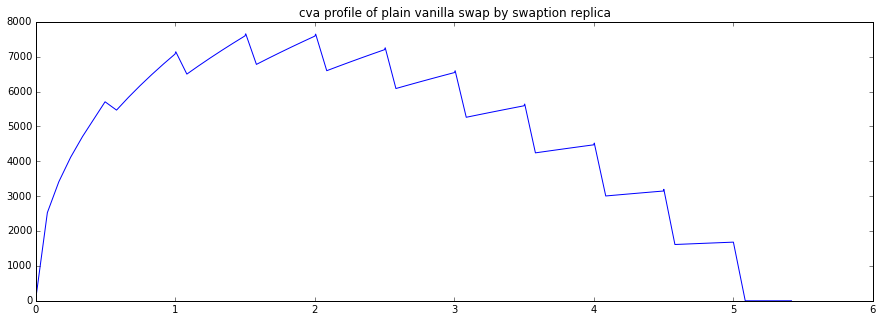

In [5]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.title("cva profile of plain vanilla swap by swaption replica")
plt.plot(check_times,EPE)

In [6]:
# for references in the mcs notebook
EPE_Swaption = EPE